<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Lineare Regression - Combined Cycle Power Plant
</b></font> </br></p>

---


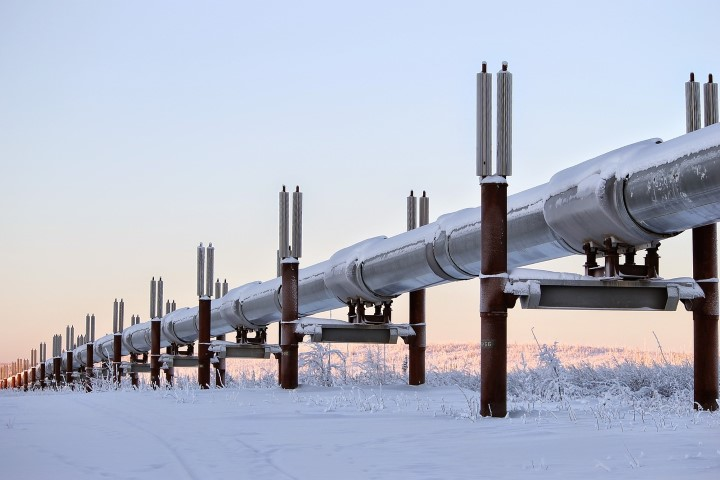

Bild von <a href="https://pixabay.com/de/users/robzor-840419/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=681175">Robson Machado</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=681175">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---

Der Datensatz ca. 9,6k Datenpunkte, die von einem GuD-Kraftwerk über 6 Jahre (2006-2011) gesammelt wurden, als das Kraftwerk mit Volllast betrieben wurde.
Daten zur stündlichen durchschnittlichen Umgebungsvariablen
+ Temperatur (AT),
+ Umgebungsdruck (AP),
+ relativer Luftfeuchtigkeit (RH) und
+ Abgasvakuum (V)
zur Vorhersage der stündlichen Nettoenergieabgabe (PE) der Anlage.




[DataSet](http://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant)    
[Info](http://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd
# df = pd.read_excel('/content/drive/MyDrive/ml-kurs/02 data/CCPP.xlsx')

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralf-42/ml-kurs/main/02%20data/CCPP.csv')

In [ ]:
label = 'PE'
features = [n for n in df.columns if n != label]

target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.corr()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Plotly
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
title_ = 'AT'
b1 = px.box(data['AT'], title=title_, width=600, height=600)

title_ = 'V'
b2 = px.box(data['V'], title=title_, width=600, height=600)

title_ = 'AP'
b3 = px.box(data['AP'], title=title_, width=600, height=600)

title_ = 'RH'
b4 = px.box(data['RH'], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=4, subplot_titles=('Temperatur', 'Umgebungsdruck', 'Abgasdruck', 'rel. Luftfeuchtigkeit'))

for trace in b1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in b2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in b3.data:
    fig.add_trace(trace, row=1, col=3)

for trace in b4.data:
    fig.add_trace(trace, row=1, col=4)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Box-Plots')

# Plot anzeigen
fig.show()

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

# **3 <font color='orange'>|</font>  Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>


<p><font color='black' size="5">
Prediction
</font></p>


In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2:5.2f}' )

In [ ]:
r2 = r2_score(target_test, target_test_pred)
print(f'Modell: {model} -- Test --- Bestimmtheitsmass: {r2:5.2f}' )

<p><font color='black' size="5">
Mean Absolut Error
</font></p>

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(target_test, target_test_pred)
print(f'Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}' )

<p><font color='black' size="5">
Regressionskoeffizienten
</font></p>

In [ ]:
print("Parameter der Regressionsgeraden:")
print('Ursprung: %10.2f' %float(model.intercept_))
anzahl = len(model.coef_)
print(f'Steigung der {anzahl} Merkmale: \n ', model.coef_)

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

In [ ]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_np = pca.fit_transform(data_test)
pca_df = pd.DataFrame(pca_np)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Boxplot
title_ = 'Boxplot real vs predict'
px.box(cube[['real', 'predict']], title=title_, width=600, height=600)

In [ ]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=10, text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=800, height=600)
fig.show()

In [ ]:
# 2 x Scatterplots
title_ = 'Streupunktdiagramm real'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real', title=title_, width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict', title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Vergleich real vs predict')

# Plot anzeigen
fig.show()

<p><font color='black' size="5">
Fehlerhafte Vorhersagen
</font></p>

In [ ]:
cube['abs_Abw%'] = abs((cube['real'] - cube['predict']) / cube['real'] *100)
%precision 3
cube.head(10).style.format("{:,.1f}")

In [ ]:
cube.describe().T

In [ ]:
# Histogramm
title_ = 'Histogramm absolute Abweichung'
fig = px.histogram(cube, x=['abs_Abw%'], nbins=20, text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)
fig.show()

In [ ]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, data_train, target_train, data_test, target_test)

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, data_train,target_train, data_test, target_test)

<p><font color='black' size="5">
Feature Importance
</font></p>

In [ ]:
from sklearn.feature_selection import f_regression
fscores, pvalues = f_regression(data_test, target_test)
for i in range(len(fscores)):
    print(f"Feature {i+1}: {data.columns[i]:10s} score = {fscores[i]:>12,.2f}, p-value = {pvalues[i]:.3f}")

In [ ]:
import plotly.express as px
px.bar(x=fscores, y=data.columns, width=800, height=600).update_yaxes(categoryorder="total ascending")

In [ ]:
from yellowbrick.model_selection import feature_importances
feature_importances(model, data, target)

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>